# Ex1

Cho phương trình f(x)= x^2, hãy sử dụng thuật toán gradient descent để tối ưu. Sau đó vẽ đồ thị hàm f(x) sau 10 lần cập nhật bước 2 với:
Lr = 0.2
Lr = 2


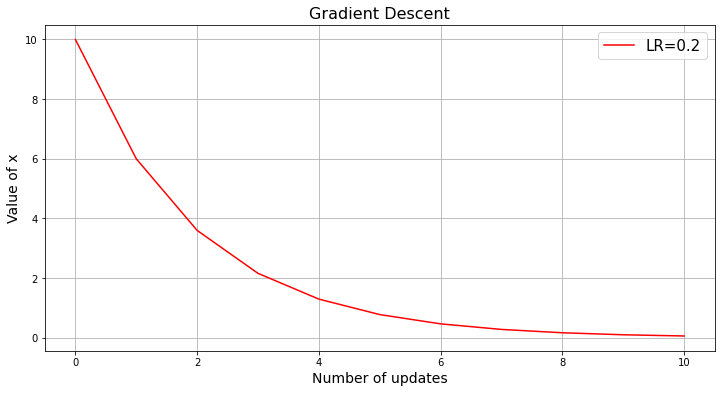

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
import numpy as np
import torch
import matplotlib.pyplot as plt

def gradient_descent(f, lr, num_updates, initial_x):
    x = torch.tensor([initial_x], requires_grad=True)
    x_history = [x.item()]

    for i in range(num_updates):
        loss = f(x)
        loss.backward()
        with torch.no_grad():  
            x -= lr * x.grad
        x.grad.zero_()
        x_history.append(x.item())

    return x_history

def f(x):
    return x**2

lr1 = 0.2
num_updates = 10
initial_x = 10.0

x_history_lr1 = gradient_descent(f, lr1, num_updates, initial_x)


plt.figure(figsize=(12, 6))
plt.plot(range(num_updates + 1), x_history_lr1, label=f'LR={lr1}',color = 'red')
plt.xlabel('Number of updates', fontsize=14)
plt.ylabel('Value of x', fontsize=14)

plt.legend(fontsize=15) 
plt.title('Gradient Descent', fontsize=16)
plt.grid(True)
plt.show()


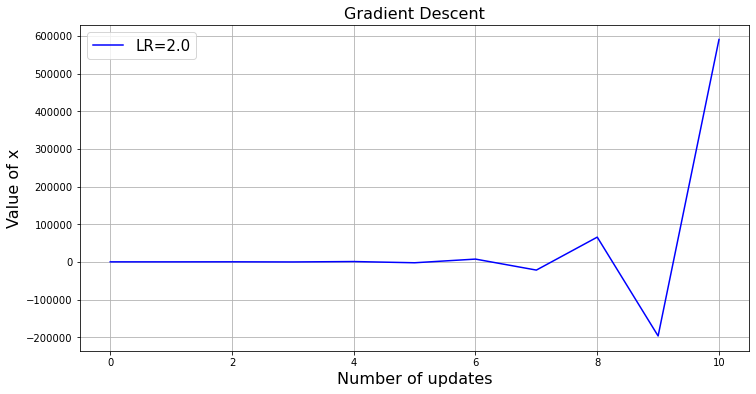

In [2]:
import torch
import matplotlib.pyplot as plt

def gradient_descent(f, lr, num_updates, initial_x):
    x = torch.tensor([initial_x], requires_grad=True)
    x_history = [x.item()]

    for i in range(num_updates):
        loss = f(x)
        loss.backward()
        with torch.no_grad():  
            x -= lr * x.grad
        x.grad.zero_()
        x_history.append(x.item())

    return x_history

def f(x):
    return x**2

lr1 = 2.0
num_updates = 10
initial_x = 10.0

x_history_lr1 = gradient_descent(f, lr1, num_updates, initial_x)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(num_updates + 1), x_history_lr1, label=f'LR={lr1}',color = 'blue')
plt.xlabel('Number of updates', fontsize=16)
plt.ylabel('Value of x', fontsize=16)

# Customize the legend
plt.legend(fontsize=15)  # Set fontsize and center the legend
plt.title('Gradient Descent', fontsize=16)
plt.grid(True)
plt.show()

# Ex 2

Cho dataset dự đoán giá nhà dựa vào diện tích
(https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv)
Dựa vào code mẫu hãy

- Implement thuật toán linear regression với dữ liệu trên
- Chỉnh learning rate cho dữ liệu trên, chọn 1 learning rate lớn bị overshoot, 1 learning vừa, và 1 learning rate nhỏ. Với mỗi learning rate, vẽ đồ thị loss tương ứng
- Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test


In [3]:
import pandas as pd
data = pd.read_csv('data_linear.csv')
data

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418
5,42.0690,625.992
6,44.4828,655.248
7,46.8966,701.377
8,49.3103,748.918
9,51.7241,757.881


In [4]:

def grad_gen(w, x, y):
  y_hat = x @ w
  grad = ((y_hat - y).T @ x / x.size(0)).reshape(-1, 1)
  return grad
def gradient_descent(w, x, y, lr=0.01, n_iter=100):
    
    for iter in range(n_iter):
        g = grad_gen(w, x, y)
        w = w - lr * g
        
    return w

In [6]:
import numpy as np
random_w = torch.randn(2, 1)
x = torch.tensor(data["Diện tích"].astype(np.float32))
y = torch.tensor(data["Giá"].astype(np.float32))
ones = (torch.zeros_like(x) + 1).reshape(-1, 1)
x = torch.cat([ones, x.reshape(-1, 1)], dim = 1) # insert 1s col to x
y = y.reshape(-1, 1)
print(x)
print(y)
     

tensor([[  1.0000,  30.0000],
        [  1.0000,  32.4138],
        [  1.0000,  34.8276],
        [  1.0000,  37.2414],
        [  1.0000,  39.6552],
        [  1.0000,  42.0690],
        [  1.0000,  44.4828],
        [  1.0000,  46.8966],
        [  1.0000,  49.3103],
        [  1.0000,  51.7241],
        [  1.0000,  54.1379],
        [  1.0000,  56.5517],
        [  1.0000,  58.9655],
        [  1.0000,  61.3793],
        [  1.0000,  63.7931],
        [  1.0000,  66.2069],
        [  1.0000,  68.6207],
        [  1.0000,  71.0345],
        [  1.0000,  73.4483],
        [  1.0000,  75.8621],
        [  1.0000,  78.2759],
        [  1.0000,  80.6897],
        [  1.0000,  83.1034],
        [  1.0000,  85.5172],
        [  1.0000,  87.9310],
        [  1.0000,  90.3448],
        [  1.0000,  92.7586],
        [  1.0000,  95.1724],
        [  1.0000,  97.5862],
        [  1.0000, 100.0000]])
tensor([[ 448.5240],
        [ 509.2480],
        [ 535.1040],
        [ 551.4320],
        [ 623.4

In [7]:
import torch
import matplotlib.pyplot as plt

def linear_regression(random_w, x, y, lr=1e-05, n_iter=1000):
    w = gradient_descent(random_w, x, y, lr, n_iter)
    y_hat = x @ w

    print("Learned weights (w):", w, "Size:", w.size())
    print("Predictions (y_hat):", y_hat, "Size:", y_hat.size())

    # Scatter plot of the data points
    plt.scatter(x[:, 1], y)

    # Plot the regression line
    plt.plot(x[:, 1], y_hat, color='orange')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression')
    plt.show()


    return y_hat

Learned weights (w): tensor([[ 1.2512],
        [14.9705]]) Size: torch.Size([2, 1])
Predictions (y_hat): tensor([[ 450.3661],
        [ 486.5018],
        [ 522.6376],
        [ 558.7734],
        [ 594.9092],
        [ 631.0449],
        [ 667.1807],
        [ 703.3165],
        [ 739.4507],
        [ 775.5865],
        [ 811.7224],
        [ 847.8582],
        [ 883.9939],
        [ 920.1296],
        [ 956.2654],
        [ 992.4012],
        [1028.5370],
        [1064.6729],
        [1100.8086],
        [1136.9443],
        [1173.0802],
        [1209.2158],
        [1245.3502],
        [1281.4860],
        [1317.6217],
        [1353.7576],
        [1389.8933],
        [1426.0291],
        [1462.1648],
        [1498.3007]]) Size: torch.Size([30, 1])


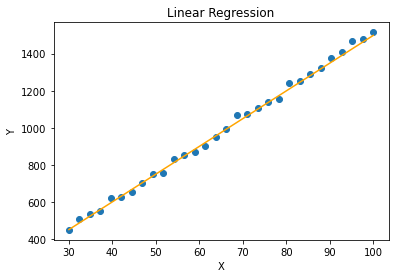

In [8]:
 a = linear_regression(random_w, x, y, 1e-05, 100)

Learned weights (w): tensor([[-5.4689e+11],
        [-3.9219e+13]]) Size: torch.Size([2, 1])
Predictions (y_hat): tensor([[-1.1771e+15],
        [-1.2718e+15],
        [-1.3665e+15],
        [-1.4611e+15],
        [-1.5558e+15],
        [-1.6505e+15],
        [-1.7451e+15],
        [-1.8398e+15],
        [-1.9345e+15],
        [-2.0291e+15],
        [-2.1238e+15],
        [-2.2185e+15],
        [-2.3131e+15],
        [-2.4078e+15],
        [-2.5025e+15],
        [-2.5971e+15],
        [-2.6918e+15],
        [-2.7865e+15],
        [-2.8811e+15],
        [-2.9758e+15],
        [-3.0705e+15],
        [-3.1651e+15],
        [-3.2598e+15],
        [-3.3545e+15],
        [-3.4491e+15],
        [-3.5438e+15],
        [-3.6385e+15],
        [-3.7331e+15],
        [-3.8278e+15],
        [-3.9225e+15]]) Size: torch.Size([30, 1])


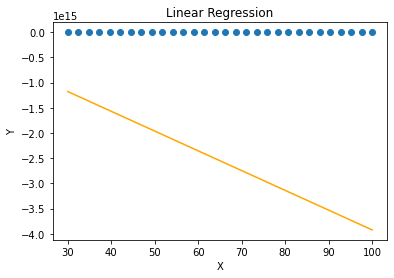

In [9]:
 a = linear_regression(random_w, x, y, 0.0005, 100) #overshot learning rate

Learned weights (w): tensor([[1.1247],
        [5.8438]]) Size: torch.Size([2, 1])
Predictions (y_hat): tensor([[176.4393],
        [190.5452],
        [204.6510],
        [218.7568],
        [232.8626],
        [246.9684],
        [261.0742],
        [275.1801],
        [289.2853],
        [303.3911],
        [317.4969],
        [331.6028],
        [345.7086],
        [359.8144],
        [373.9202],
        [388.0260],
        [402.1318],
        [416.2377],
        [430.3435],
        [444.4493],
        [458.5551],
        [472.6609],
        [486.7662],
        [500.8720],
        [514.9778],
        [529.0837],
        [543.1895],
        [557.2953],
        [571.4011],
        [585.5070]]) Size: torch.Size([30, 1])


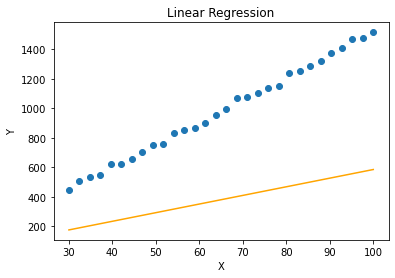

In [10]:
 a = linear_regression(random_w, x, y, 1e-06, 100)# too small learning rate

In [11]:
x[:,1] = x[:,1]/100
y[:,0] = y[:,0]/1000

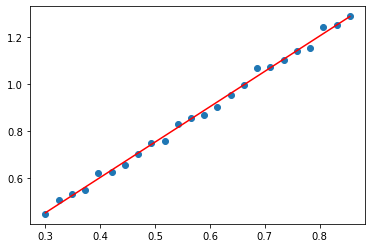

In [12]:
train_size = int(0.8 * len(x))
x_train, x_test, y_train, y_test = x[:train_size], x[train_size:], y[:train_size], y[train_size:]

weight = gradient_descent(random_w, x_train, y_train, lr=1.1, n_iter=1000)
y_hat = x_train @ weight

plt.scatter(x_train[:, 1], y_train)
plt.plot(x_train[:, 1], y_hat, color='red')

In [13]:

y_test_hat = x_test @ weight


y_test_hat = y_test_hat.numpy()

mse = mean_squared_error(y_test,y_test_hat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_hat)
mape = mean_absolute_percentage_error(y_test, y_test_hat)

In [14]:
print(f'MSE: {mse:f}')
print(f'RMSE: {rmse:f}')
print(f'MAE: {mae:f}')
print(f'MAPE: {mape:f}')
     

MSE: 0.000362
RMSE: 0.019039
MAE: 0.015543
MAPE: 0.010755
